# Planteo y resolución de un Dataset sobre el viaje del Titanic

En el siguiente modelo vamos a realizar un análisis exploratorio de datos sobre la base de datos de pasajeros del Titanic.

Dicha base de datos se puede descargar desde la siguiente dirección (https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv)

El set de datos se descargará de forma local en el almacenamiento de Google Colab y luego se importará a un DataFrame de Pandas para su procesamiento.

Para ello se deberán realizar las siguientes acciones:

1. Describir la estructura del conjunto de datos.
2. Obtener algunos indicadores estadísticos de las columnas:
  1. age
  2. fare
3. Caracterizar a grandes rasgos el pasaje de barco de acuerdo a sexo, edad y nivel socioeconómico
4. Representar cada una de esas características mediante un gráfico adecuado
5. Categorizar el pasaje nuevamente, pero considerando solamente los pasajeros embarcados en el puerto de Shouthampton
6. ¿Puede sacar alguna conclusión comparando las dos muestras de datos?
7. Reemplazar los valores nulos en el campo `age` con el promedio de edades calculado para la misma columna. ¿Cómo cambia el promedio de edades al hacer ese cambio?
8. ¿Qué proporción de hombres adultos sobrevivieron en relación a todos los hombres del barco?
9. ¿Qué proporción con respecto al total de pasajeros?
10. ¿Qué proporción de pasajeros sobrevivieron, de acuerdo al tipo de cubierta en la que viajaban?
11. Divida los valores de la columna `fare` (Precio del boleto) en 4 segmentos.
12. Utilize esos segmentos para comparar los supervivientes, con respecto a la cantidad total de supervivientes del pasaje
13. ¿Obtiene alguna información útil con respecto a este análisis?
14. Realice el mismo análisis con el campo `age` (Edad) de los pasajeros.
15. ¿Obtiene información útil en este caso?

NOTA: El set de datos se descargará de manera local mediante el primer comando que aparece debajo de este enunciado

NOTA2: Estructura del archivo de datos

| Campo | Variable | Definition                                 | Key                                            |
|:-:|----------|--------------------------------------------|------------------------------------------------|
| 0 | survived | Survival | 0 = No, 1 = Yes |
| 1 | pclass   | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| 2 | sex      | Sex | Sexo |
| 3 | age      | Age in years | Edad en años |
| 4 | sibsp    | # of siblings / spouses aboard the Titanic | Cantidad de hermanos/esposa en el Titanic|
| 5 | parch    | # of parents / children aboard the  Titanic | Cantidad de padres/hijos en el Titanic|
| 6 | fare     | Passenger fare | Precio del boleto |
| 7 | embarked | Puerto de embarque | C = Cherbourg, Q = Queenstown, S = Southampton |
| 8 | class | Clase del boleto | First, Second, Third |
| 9 | who | Identidad | woman, men, child |
|10 |adult_male| Hombre adulto | False,True |
|11 | deck | Cubierta | |
|12 |embark_town| Ciudad de embarque |
|13 |alive| Vivo | yes, no |
|14 |alone| Solo | True,False |


In [ ]:
!wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

--2023-08-23 22:29:40--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57018 (56K) [text/plain]
Saving to: ‘titanic.csv.3’

titanic.csv.3       100%[===================>]  55.68K  --.-KB/s    in 0.002s  

2023-08-23 22:29:40 (24.9 MB/s) - ‘titanic.csv.3’ saved [57018/57018]



## Describir la estructura del conjunto de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Obtener indicadores estadísticos de las siguientes columnas

* age
* fare

In [ ]:
df[['age','fare']].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Caracterizar a grandes rasgos el pasaje de barco de acuerdo a sexo, edad y nivel socioeconómico

In [ ]:
surv_sexo = pd.DataFrame(df.groupby(by='sex')['survived'].count())
surv_edad = pd.DataFrame(df.groupby(by='age')['survived'].count())
surv_pclass = pd.DataFrame(df.groupby(by='pclass')['survived'].count())

surv_sexo

,survived
sex,
female,314
male,577


## Representar cada una de esas características mediante un gráfico adecuado

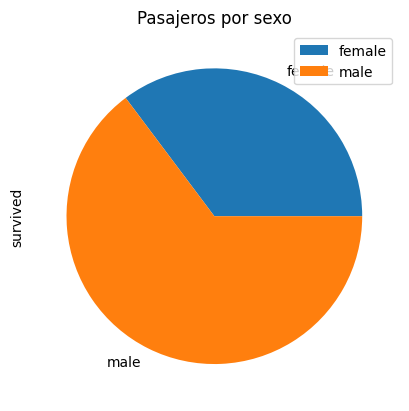

In [ ]:
p = surv_sexo.plot.pie(y='survived',title='Pasajeros por sexo')

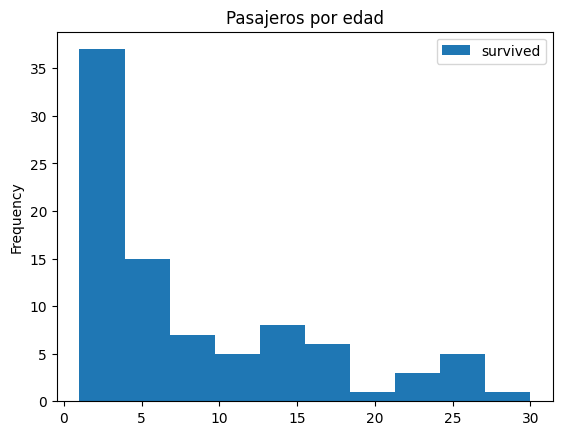

In [ ]:
p = surv_edad.plot.hist(y='survived',title='Pasajeros por edad')

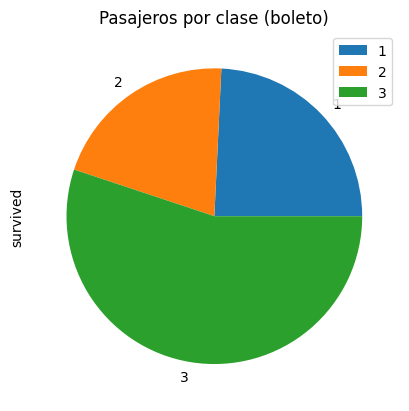

In [ ]:
p = surv_pclass.plot.pie(y='survived',title='Pasajeros por clase (boleto)')

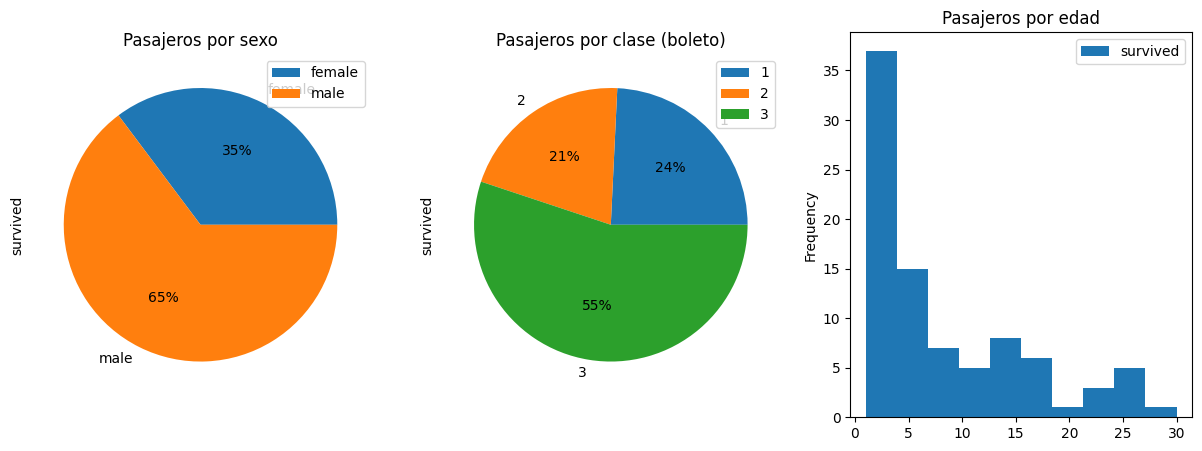

In [ ]:
# Una mejor manera de graficar múltiples graficos en un solo lugar para comparar
#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3)

p = surv_sexo.plot.pie(y='survived',title='Pasajeros por sexo',ax=axes[0],figsize=(15, 5),autopct="%.0f%%")
p = surv_edad.plot.hist(y='survived',title='Pasajeros por edad',ax=axes[2])
p = surv_pclass.plot.pie(y='survived',title='Pasajeros por clase (boleto)',ax=axes[1],autopct="%.0f%%")

## Categorizar el pasaje nuevamente, pero considerando solamente los pasajeros embarcados en el puerto de Shouthampton

In [ ]:
pasaje_south = df.loc[
    (df['embarked'] == 'S')
]
south_sexo = pd.DataFrame(pasaje_south.groupby(by='sex')['survived'].count())
south_edad = pd.DataFrame(pasaje_south.groupby(by='age')['survived'].count())
south_pclass = pd.DataFrame(pasaje_south.groupby(by='pclass')['survived'].count())

In [ ]:
# Una mejor manera de graficar múltiples graficos en un solo lugar para comparar

#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3)

p = south_sexo.plot.pie(y='survived',title='Pasajeros por sexo',ax=axes[0],figsize=(15, 5),autopct="%.0f%%")
p.set_ylabel("")
p = south_edad.plot.hist(y='survived',title='Pasajeros por edad',ax=axes[2])
p = south_pclass.plot.pie(y='survived',title='Pasajeros por clase (boleto)',ax=axes[1],autopct="%.0f%%")
p.set_ylabel("")

## ¿Puede sacar alguna conclusión comparando las dos muestras de datos?

> Las muestras tienen una diferencia de menos de 4 puntos porcentuales lo que hace que se pueda considerar que en lo que respecta a sexo y clase social el embarque de SouthHampton es representativo de la totalidad de pasajeros del Titanic.

> Aún así la distribución de edades de los pasajeros es diferente, pero al no ser el gráfico muy adecuado para la visualización de este tipo de información, no pueden afirmarse nada concluyente al respecto.


## Reemplazar los valores nulos en el campo age con el promedio de edades calculado para la misma columna. ¿Cómo cambia el promedio de edades al hacer ese cambio?

In [ ]:
# Primero se debe calcular el promedio de edades
prom_age = df['age'].mean()
print (f"El promedio de edad (con nulos) es: {prom_age:.2f}")
# Ahora podemos utilizar ese promedio para reemplazar los valores nulos
df['age'] = df['age'].fillna(prom_age)
# Ahora calcular el promedio de edades con los nullos reemplazados
prom_age_2 = df2['age'].mean()
print (f"El promedio de edad (sin nulos) es: {prom_age_2:.2f}")


El promedio de edad (con nulos) es: 29.70
El promedio de edad (sin nulos) es: 29.70


## ¿Qué proporción de hombres adultos sobrevivieron en relación a todos los hombres del barco?

In [ ]:
# Calcular la cantidad total de hombre del barco
hombres_adultos = df.loc[
    (df['sex'] == 'male')
]['sex'].count()
# Calcular la cantidad total de hombres y que además han sobrevivido
hombres_adultos_sobrevivientes = df.loc[
    (df['adult_male'] == True)
    &
    (df['survived'] == True)
]['sex'].count()

proporcion = hombres_adultos_sobrevivientes/hombres_adultos
print (f"Sobrevivieron {hombres_adultos_sobrevivientes} hombres adultos, de un total de {hombres_adultos}")
print (f"Lo que hace una proporción de {proporcion*100:.2f}%")

Sobrevivieron 88 hombres adultos, de un total de 577
Lo que hace una proporción de 15.25%


## ¿Qué proporción con respecto al total de pasajeros?

In [ ]:
# Calcular la cantidad de pasajeros
pasajeros = df['survived'].count()
proporcion_pasajeros = hombres_adultos_sobrevivientes/pasajeros
print (f"Sobrevivieron {hombres_adultos_sobrevivientes} hombres adultos, de un total de {pasajeros} pasajeros")
print (f"Lo que hace una proporción de {proporcion_pasajeros*100:.2f}%")

Sobrevivieron 88 hombres adultos, de un total de 891 pasajeros
Lo que hace una proporción de 9.88%


## ¿Qué proporción de pasajeros sobrevivieron, de acuerdo al tipo de cubierta en la que viajaban?

In [ ]:
# Para eso debemos CONTAR todos los valores agrupados por deck
# Y por otro lado SUMAR los que son iguales a 1 (supervivientes)
sobrevivientes_por_cubierta = df.groupby(by='deck')['survived'].agg(['sum','count'])
sobrevivientes_por_cubierta['proporcion'] = sobrevivientes_por_cubierta['sum']/sobrevivientes_por_cubierta['count']*100
sobrevivientes_por_cubierta

,sum,count,proporcion
deck,,,
A,7,15,46.666667
B,35,47,74.468085
C,35,59,59.322034
D,25,33,75.757576
E,24,32,75.000000
F,8,13,61.538462
G,2,4,50.000000


## Divida los valores de la columna fare (Precio del boleto) en 3 segmentos.

In [ ]:
# 4 valores, 3 segmentos
bins = [0, .33, .66, 1]
# 3 segmentos, 3 etiquetas
labels = ['baja', 'media', 'alta']
df['clase-social'] = pd.qcut(df['fare'],q=bins,labels=labels)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,clase-social
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,baja
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,alta
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,baja
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,alta
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,media
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,alta
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,media
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,alta


## Utilize esos segmentos para comparar los supervivientes, con respecto a la cantidad total de supervivientes del pasaje

In [ ]:
# Para eso debemos CONTAR todos los valores agrupados por clase social (que recién creamos)
# Y por otro lado SUMAR los que son iguales a 1 (supervivientes)
sobrevivientes_por_cs = df.groupby(by='clase-social')['survived'].agg(['sum','count'])
sobrevivientes_por_cs['proporcion'] = sobrevivientes_por_cs['sum']/sobrevivientes_por_cs['count']*100
sobrevivientes_por_cs

,sum,count,proporcion
clase-social,,,
baja,60,294,20.408163
media,117,302,38.741722
alta,165,295,55.932203


## ¿Obtiene alguna información útil con respecto a este análisis?

Es de destacar que a mayor clase social (obtenida del precio del pasaje pagado), es mayor la supervivencia.

## Realice el mismo análisis con el campo age (Edad) de los pasajeros.

In [ ]:
bins = [0, 15, 30, 45, 50, 65]
labels = ['niño', 'joven', 'adulto', 'adulto>50', 'mayor']
df['rango-edad'] = pd.cut(df['age'],bins=bins,labels=labels)
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,clase-social,rango-edad
604,1,1,male,35.0,0,0,26.5500,C,First,man,True,NaN,Cherbourg,yes,True,alta,adulto
93,0,3,male,26.0,1,2,20.5750,S,Third,man,True,NaN,Southampton,no,False,media,joven
261,1,3,male,3.0,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False,alta,niño
666,0,2,male,25.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,media,joven
102,0,1,male,21.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False,alta,joven
183,1,2,male,1.0,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False,alta,niño
137,0,1,male,37.0,1,0,53.1000,S,First,man,True,C,Southampton,no,False,alta,adulto
318,1,1,female,31.0,0,2,164.8667,S,First,woman,False,C,Southampton,yes,False,alta,adulto
847,0,3,male,35.0,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True,baja,adulto
804,1,3,male,27.0,0,0,6.9750,S,Third,man,True,NaN,Southampton,yes,True,baja,joven


In [ ]:
# Para eso debemos CONTAR todos los valores agrupados por rango-edad (que recién creamos)
# Y por otro lado SUMAR los que son iguales a 1 (supervivientes)
sobrevivientes_por_re = df.groupby(by='rango-edad')['survived'].agg(['sum','count'])
#sobrevivientes_por_re['proporcion'] = sobrevivientes_por_re['sum']/sobrevivientes_por_re['count']*100
sobrevivientes_por_re

,sum,count
rango-edad,,
niño,49,83
joven,169,503
adulto,86,202
adulto>50,16,39
mayor,21,56


## ¿Obtiene información útil en este caso?

Si bien hay algunos datos interesantes, no hay una diferencia substancial que permita hacer afirmaciones concluyentes.

Se puede ver que el rango de edades que más supervivencia tuvo es el de los niños menores a 15 años (en relación a su cantidad y sin tener en cuenta sexos).

Hubo una baja tasa de supervivencia de jóvenes (entre 15 y 30 años) y también entre adultos mayores (más de 65 años).

El rango de entre 30 y 65 años mantiene el mismo valor de supervivencia, de alrededor de 41%.

### NOTA: Replanteando el gráfico de edades con los nuevos rangos, obtenemos una mejor representación.

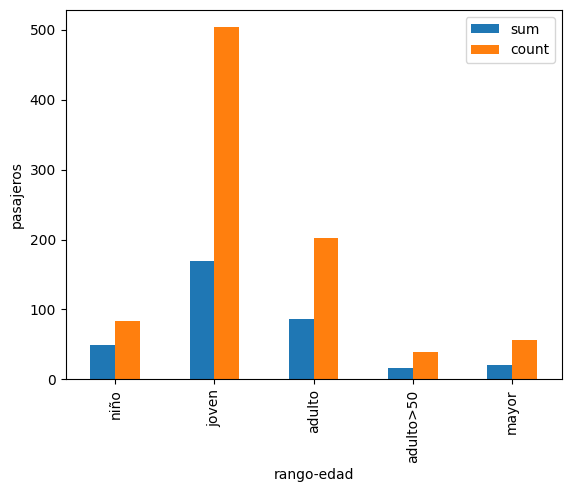

In [ ]:
p = sobrevivientes_por_re.plot(kind='bar',ylabel='pasajeros')

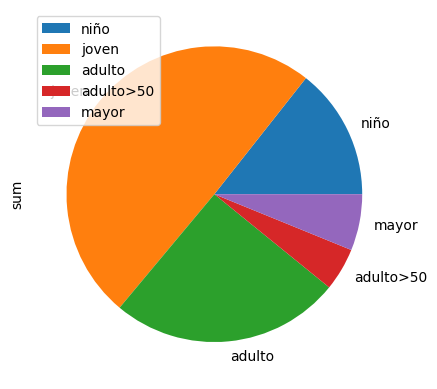

In [ ]:
p = sobrevivientes_por_re.plot(kind='pie',y='sum')